In [68]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))


In [69]:
from load_data import PostgresDataLoader

In [70]:

# Example usage with the correct host
host = "localhost"  # Or the actual hostname/IP of your PostgreSQL server
database = "Telecom"
user = "postgres"
password = "Samin2384"
query = "SELECT * FROM xdr_data"

loader = PostgresDataLoader(host, database, user, password)

# Connect to the PostgreSQL database
loader.connect()

# Load data using a SQL query
df = loader.load_data(query)

# Print the loaded DataFrame
if df is not None:
    print(df)

# Close the connection
loader.close()

Connection to PostgreSQL DB successful


d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\load_data.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, self.connection)


Data successfully loaded into DataFrame
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number 

Missing Data handing
---
1. Check the missing data in df
2. Check the percentage of missing data in df
3. Filling catagoical columns like 'Handset type', 'Handset manufacturer', 'Bearer Id','MSISDN/Number', 'Last location name' will be filled with "UNKNOWN"
4. Filling Numerical columns with "Mean"
5. create new datafram df_final which is clean of missing data. this dataframe will be used until the end of the project.

In [71]:
from missing_and_handset_analysis import DataFrameMissingValueChecker
from missing_and_handset_analysis import HandsetAnalysis

In [72]:
checker = DataFrameMissingValueChecker(df)
checker.check_missing_values()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [73]:
checker.calculate_missing_percent()

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [74]:
import pandas as pd
import numpy as np
def drop_columns(df):
    """
    Drop specific columns from the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame from which columns will be dropped.

    Returns:
    - pd.DataFrame: The DataFrame with specified columns removed.
    """
    # Specify the columns to drop directly
    df_dropped = df.drop(columns=['Handset type', 'Handset manufacturer', 'Bearer Id','MSISDN/Number', 'Last location name'], errors='ignore')
    return df_dropped

# lets fill catogorical columns with "unkown"
checker_missing_catagorical  = DataFrameMissingValueChecker(df)
df_catagory= checker_missing_catagorical.fill_missing_and_undefined(['Handset type', 'Handset manufacturer', 'Bearer Id','MSISDN/Number', 'Last location name'])

#LETS fill numerical columns with "mean"
df_cleaned = drop_columns(df_catagory)
checker_missing  = DataFrameMissingValueChecker(df_cleaned)
df_clean = checker_missing.fill_missing_numerical(method='mean')

# lets merge them
df_final = pd.merge(df_clean, df_catagory, how='inner')  # 'inner' for intersection, 'outer' for union


Column 'Handset type' not found in DataFrame.
Column 'Handset manufacturer' not found in DataFrame.
Replaced 'undefined' and NaN values in 'Bearer Id' with 'Unknown'.
Replaced 'undefined' and NaN values in 'MSISDN/Number' with 'Unknown'.
Column 'Last location name' not found in DataFrame.
Filled missing values in column 'Start ms' using method 'mean' with value 499.1882.
Filled missing values in column 'End ms' using method 'mean' with value 498.80088.
Filled missing values in column 'Dur. (ms)' using method 'mean' with value 104608.56034666667.
Filled missing values in column 'IMSI' using method 'mean' with value 208201639651669.06.
Filled missing values in column 'IMEI' using method 'mean' with value 48474547977654.54.
Filled missing values in column 'Avg RTT DL (ms)' using method 'mean' with value 109.79570605376027.
Filled missing values in column 'Avg RTT UL (ms)' using method 'mean' with value 17.662882910900326.
Filled missing values in column 'Avg Bearer TP DL (kbps)' using met

d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\missing_and_handset_analysis.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column_name].replace('undefined', pd.NA, inplace=True)
d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\missing_and_handset_analysis.py:97: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [75]:
# lets checking missing value in the final dataframe
checker_df_final = DataFrameMissingValueChecker(df_final)
checker_df_final.calculate_missing_percent()


Start                                       0.000000
Start ms                                    0.000000
End                                         0.000000
End ms                                      0.000000
Dur. (ms)                                   0.000000
IMSI                                        0.000000
IMEI                                        0.000000
Last Location Name                          0.288723
Avg RTT DL (ms)                             0.000000
Avg RTT UL (ms)                             0.000000
Avg Bearer TP DL (kbps)                     0.000000
Avg Bearer TP UL (kbps)                     0.000000
TCP DL Retrans. Vol (Bytes)                 0.000000
TCP UL Retrans. Vol (Bytes)                 0.000000
DL TP < 50 Kbps (%)                         0.000000
50 Kbps < DL TP < 250 Kbps (%)              0.000000
250 Kbps < DL TP < 1 Mbps (%)               0.000000
DL TP > 1 Mbps (%)                          0.000000
UL TP < 10 Kbps (%)                         0.

Hand set Analysis
---
1. Top 10 handset by users 
2. Top 3 Handset Manufacturers
3. Top 5 Handsets per 3 Manufacturer 

In [76]:
from missing_and_handset_analysis import HandsetAnalysis
analysis_handset = HandsetAnalysis(df_final)
print("Top 10 Handsets:\n", analysis_handset.get_top_handsets())

Top 10 Handsets:
 Handset Type
Huawei B528S-23A                8849
Huawei E5180                     798
Apple iPhone 7 (A1778)           531
Apple iPhone Xr (A2105)          516
Apple iPhone 6S (A1688)          512
Apple iPhone 6 (A1586)           510
Apple iPhone 8 (A1905)           431
Apple iPhone X (A1901)           429
Samsung Galaxy S8 (Sm-G950F)     395
Apple iPhone 8 Plus (A1897)      319
Name: count, dtype: int64


d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\missing_and_handset_analysis.py:165: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df['Handset Type'].replace('undefined', pd.NA, inplace=True)
d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\missing_and_handset_analysis.py:166: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [77]:
print("\nTop 3 Handset Manufacturers:\n", analysis_handset.get_top_manufacturers())


Top 3 Handset Manufacturers:
 Handset Manufacturer
Huawei     10448
Apple       4394
Samsung     2026
Name: count, dtype: int64


In [78]:
print("\nTop 5 Handsets per Manufacturer:\n", analysis_handset.get_top_handsets_per_manufacturer())


Top 5 Handsets per Manufacturer:
 {'Huawei': Handset Type
Huawei B528S-23A                  8849
Huawei E5180                       798
Huawei P20                          97
Huawei P20 Pro                      94
Huawei P20 Lite Huawei Nova 3E      84
Name: count, dtype: int64, 'Apple': Handset Type
Apple iPhone 7 (A1778)     531
Apple iPhone Xr (A2105)    516
Apple iPhone 6S (A1688)    512
Apple iPhone 6 (A1586)     510
Apple iPhone 8 (A1905)     431
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)         395
Samsung Galaxy S9 Sm-G960F Ds        201
Samsung Galaxy S7 (Sm-G930X)         180
Samsung Galaxy S7 Edge (Sm-G935X)    134
Samsung Galaxy S9 Plus (Sm-G965F)    116
Name: count, dtype: int64}


In [79]:
from luxury_plot import LuxuriousPlotter

d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\luxury_plot.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette='YlGnBu')


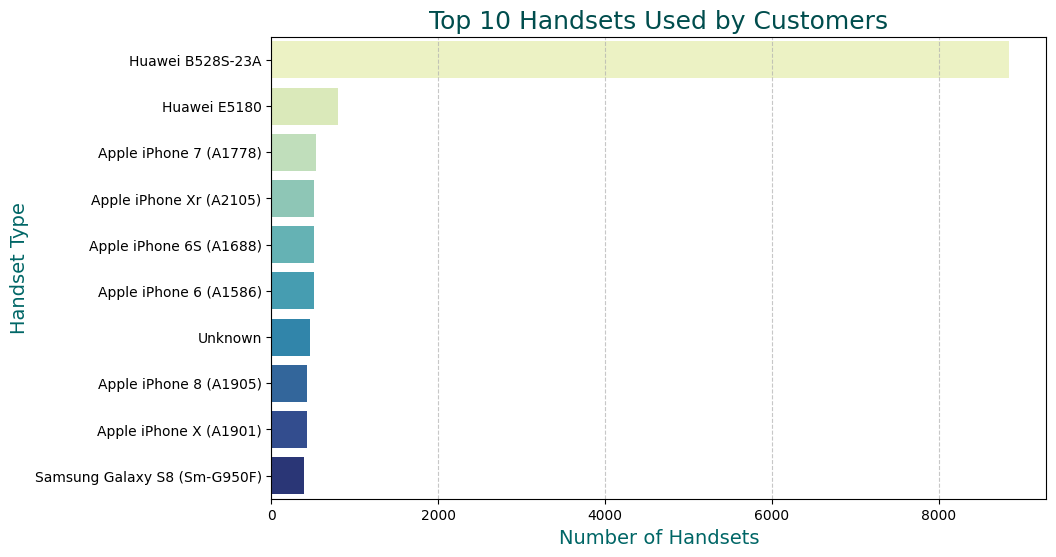

d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\luxury_plot.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values, palette='BuPu')


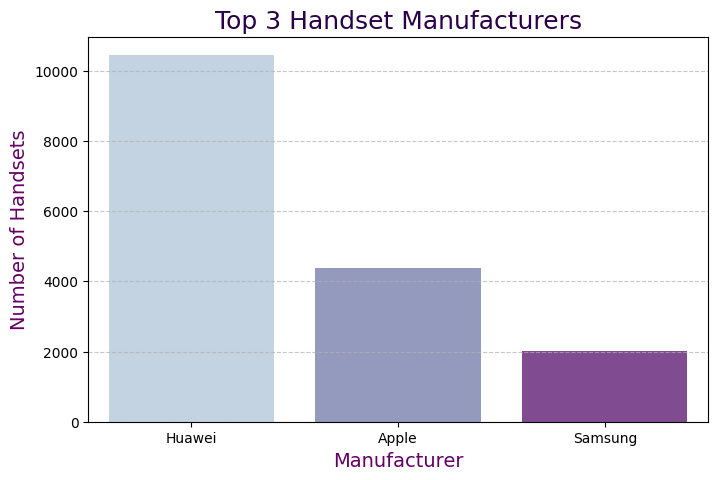

d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\luxury_plot.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=handsets.values, y=handsets.index, palette='GnBu', ax=axes[i])
d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\luxury_plot.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=handsets.values, y=handsets.index, palette='GnBu', ax=axes[i])
d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\luxury_plot.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=handsets.values, y=handsets.index, palette='GnBu', ax=axes[i])


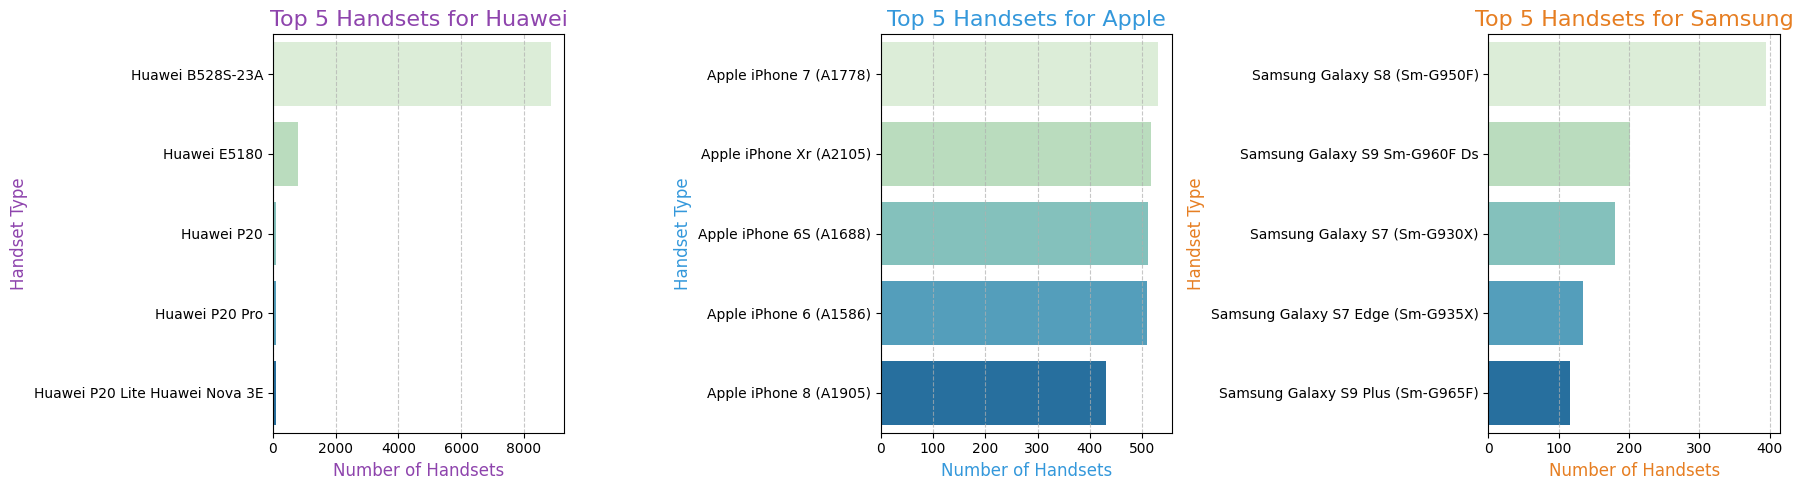

In [80]:
handset_df = df_final["Handset Type"]
handset_manufacturer = df_final['Handset Manufacturer']

luxurious_plotter = LuxuriousPlotter(handset_df, handset_manufacturer)
luxurious_plotter.plot_top_handsets()
luxurious_plotter.plot_top_manufacturers()
luxurious_plotter.plot_top_handsets_per_manufacturer()

User Behavour Analysis
---
1. Describe all relevant variables and associated data types (slide). findings. 
2. Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 
3. Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
4. Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 
5. Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.
6. Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your 
7. Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, YouTube data, Netflix data, Gaming data, and Other data 
8. Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points maximum). 


In [81]:
# lets create a new data frame for this task
selected_columns = ['Social Media DL (Bytes)', 'YouTube DL (Bytes)', 'Netflix DL (Bytes)', 
                    'Google DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
                    'Social Media UL (Bytes)', 'YouTube UL (Bytes)', 'Netflix UL (Bytes)', 
                    'Google UL (Bytes)', 'Email UL (Bytes)', 'Gaming UL (Bytes)', 
                    'Other UL (Bytes)', 'MSISDN/Number', 'Dur. (ms)']
##new_df = df_final[selected_columns]
##new_df = new_df.reset_index(drop=True)
#new_df

existing_columns = [col for col in selected_columns if col in df_final.columns]
new_df = df_final[existing_columns]
new_df = new_df.reset_index(drop=True)
new_df

Social Media DL (Bytes)  Netflix DL (Bytes)  Google DL (Bytes)  \
0                     829305.0          18094847.0          7241855.0   
1                    3184530.0          18625220.0         10719953.0   
2                    2432521.0          15879318.0          3240592.0   
3                    2858041.0           5444485.0          4954251.0   
4                    1769010.0          10783199.0          7052986.0   
...                        ...                 ...                ...   
17659                3528163.0          18826490.0          3611580.0   
17660                1224460.0          22890549.0          2234382.0   
17661                2544036.0          22559018.0          4791342.0   
17662                2393219.0          18726138.0         10154410.0   
17663                 979709.0           2029635.0          3821785.0   

       Email DL (Bytes)  Gaming DL (Bytes)  Other DL (Bytes)  \
0             1541381.0        504604946.0       526987098.0   
1              141717.0        373953102.0       161357015.0   
2              726091.0         48891264.0       525208955.0   
3             1292760.0        164451149.0       415002189.0   
4             2797274.0        496879416.0       247233250.0   
...                 ...                ...               ...   
17659         3533781.0        395964234.0       771516975.0   
17660         2664337.0        102822680.0       666772734.0   
17661         2556354.0        657274584.0        66680072.0   
17662         2413522.0        308033327.0       278137326.0   
17663         3551536.0        365096332.0       624206761.0   

       Social Media UL (Bytes)  Netflix UL (Bytes)  Google UL (Bytes)  \
0                      10046.0           2029991.0          1580541.0   
1                       9277.0          14679856.0            36395.0   
2                      56156.0          10650621.0           264372.0   
3                      16452.0          17740302.0          2870296.0   
4                       6983.0           8000048.0          2990860.0   
...                        ...                 ...                ...   
17659                  34176.0           6017956.0          3785135.0   
17660                  32419.0          14878522.0          2859089.0   
17661                  31852.0          15263948.0            16911.0   
17662                  33879.0          16090030.0          2391865.0   
17663                  21860.0           3443119.0           171725.0   

       Email UL (Bytes)  Gaming UL (Bytes)  Other UL (Bytes)  MSISDN/Number  \
0              807271.0          1063672.0        11382619.0  33664473872.0   
1              902776.0           574875.0          134689.0  33658752999.0   
2              673073.0         13607386.0         6472727.0  33662737192.0   
3              660744.0          6446720.0         4883208.0  33669165983.0   
4              433849.0          1530545.0         1175435.0  33665550434.0   
...                 ...                ...               ...            ...   
17659           80160.0          4501221.0         3904640.0  33663962689.0   
17660          850586.0          2732534.0        10601725.0  33665134193.0   
17661          738144.0          3569715.0         3552410.0  33650689119.0   
17662          830964.0         11458772.0        14543296.0  33668555747.0   
17663          113034.0          8496393.0         9343135.0  33761274518.0   

       Dur. (ms)  
0       889834.0  
1       706649.0  
2       314961.0  
3       285833.0  
4       259201.0  
...          ...  
17659    86399.0  
17660    86399.0  
17661    85215.0  
17662    86399.0  
17663    83844.0  

[17664 rows x 14 columns]

In [82]:
# Check the actual columns in the DataFrame
print(df_final.columns)

# Renaming dictionary (considering proper names)
rename_dict = {
    'Youtube DL (Bytes)': 'YouTube DL (Bytes)', 
    'Youtube UL (Bytes)': 'YouTube UL (Bytes)',
    'Other DL': 'Other DL (Bytes)',  # This column might be missing
    'Other UL': 'Other UL (Bytes)'
}

# Safely rename columns only if they exist in the DataFrame
rename_dict_existing = {k: v for k, v in rename_dict.items() if k in df_final.columns}

# Apply renaming
df_final.rename(columns=rename_dict_existing, inplace=True)

from User_Behavior import UserBehaviorAnalysis
analysis_User_behaviour_analysis = UserBehaviorAnalysis(new_df, user_id_col='MSISDN/Number', session_duration_col='Dur. (ms)')


Index(['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'IMEI',
       'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL 

KeyError: "['YouTube DL (Bytes)'] not in index"

In [77]:
analysis_User_behaviour_analysis.describe_variables()

Variables and their data types:
 Social Media DL (Bytes)    float64
YouTube DL (Bytes)         float64
Netflix DL (Bytes)         float64
Google DL (Bytes)          float64
Email DL (Bytes)           float64
Gaming DL (Bytes)          float64
Other DL (Bytes)           float64
Social Media UL (Bytes)    float64
YouTube UL (Bytes)         float64
Netflix UL (Bytes)         float64
Google UL (Bytes)          float64
Email UL (Bytes)           float64
Gaming UL (Bytes)          float64
Other UL (Bytes)           float64
MSISDN/Number               object
Dur. (ms)                  float64
Total DL (Bytes)           float64
Total UL (Bytes)           float64
Total Data (Bytes)         float64
dtype: object

Summary Statistics:
         Social Media DL (Bytes)  YouTube DL (Bytes)  Netflix DL (Bytes)  \
count              1.766400e+04        1.766400e+04        1.766400e+04   
unique                      NaN                 NaN                 NaN   
top                         NaN          

Social Media DL (Bytes)  YouTube DL (Bytes)  Netflix DL (Bytes)  \
count              1.766400e+04        1.766400e+04        1.766400e+04   
unique                      NaN                 NaN                 NaN   
top                         NaN                 NaN                 NaN   
freq                        NaN                 NaN                 NaN   
mean               1.793382e+06        1.171713e+07        1.168317e+07   
std                1.033700e+06        6.739185e+06        6.704868e+06   
min                4.840000e+02        1.156000e+03        9.640000e+02   
25%                8.967348e+05        5.857880e+06        5.870391e+06   
50%                1.800267e+06        1.177712e+07        1.171669e+07   
75%                2.683028e+06        1.761504e+07        1.748560e+07   
max                3.586034e+06        2.325735e+07        2.325883e+07   

        Google DL (Bytes)  Email DL (Bytes)  Gaming DL (Bytes)  \
count        1.766400e+04      1.766400e+04       1.766400e+04   
unique                NaN               NaN                NaN   
top                   NaN               NaN                NaN   
freq                  NaN               NaN                NaN   
mean         5.750454e+06      1.787343e+06       4.219150e+08   
std          3.303486e+06      1.040727e+06       2.454679e+08   
min          1.324000e+03      1.400000e+02       6.859400e+04   
25%          2.864823e+06      8.771195e+05       2.074162e+08   
50%          5.781786e+06      1.791601e+06       4.227919e+08   
75%          8.615273e+06      2.690821e+06       6.351854e+08   
max          1.146275e+07      3.586068e+06       8.434419e+08   

        Other DL (Bytes)  Social Media UL (Bytes)  YouTube UL (Bytes)  \
count       1.766400e+04             17664.000000        1.766400e+04   
unique               NaN                      NaN                 NaN   
top                  NaN                      NaN                 NaN   
freq                 NaN                      NaN                 NaN   
mean        4.248171e+08             32981.631680        1.104442e+07   
std         2.415661e+08             19092.017971        6.349393e+06   
min         5.995600e+04                 1.000000        2.970000e+02   
25%         2.176326e+08             16489.750000        5.529985e+06   
50%         4.273914e+08             33022.000000        1.101640e+07   
75%         6.331604e+08             49449.000000        1.654629e+07   
max         8.434085e+08             65870.000000        2.201182e+07   

        Netflix UL (Bytes)  Google UL (Bytes)  Email UL (Bytes)  \
count         1.766400e+04       1.766400e+04      17664.000000   
unique                 NaN                NaN               NaN   
top                    NaN                NaN               NaN   
freq                   NaN                NaN               NaN   
mean          1.107166e+07       2.057107e+06     468531.044554   
std           6.320654e+06       1.193026e+06     271211.989897   
min           2.430000e+02       3.250000e+02         49.000000   
25%           5.617303e+06       1.022210e+06     232841.500000   
50%           1.104988e+07       2.041898e+06     468250.500000   
75%           1.652058e+07       3.094551e+06     703690.250000   
max           2.201196e+07       4.121217e+06     936417.000000   

        Gaming UL (Bytes)  Other UL (Bytes) MSISDN/Number     Dur. (ms)  \
count        1.766400e+04      1.766400e+04         17664  1.766400e+04   
unique                NaN               NaN         13731           NaN   
top                   NaN               NaN       Unknown           NaN   
freq                  NaN               NaN            55           NaN   
mean         8.316256e+06      8.225842e+06           NaN  8.199702e+04   
std          4.796112e+06      4.762630e+06           NaN  4.508840e+04   
min          7.900000e+01      2.150000e+02           NaN  8.125000e+03   
25%          4.134789e+06      4

In [78]:
analysis_User_behaviour_analysis.transform_and_aggregate()



Decile Class Aggregation:
                   total_dl      total_ul    total_data
decile_class                                          
1             1.198188e+09  3.686825e+07  1.235056e+09
2             2.405081e+12  1.133068e+11  2.518388e+12
3             5.673049e+12  2.643168e+11  5.937365e+12
4             1.735882e+12  8.184420e+10  1.817727e+12
5             5.719635e+12  2.685487e+11  5.988184e+12


total_dl      total_ul    total_data
decile_class                                          
1             1.198188e+09  3.686825e+07  1.235056e+09
2             2.405081e+12  1.133068e+11  2.518388e+12
3             5.673049e+12  2.643168e+11  5.937365e+12
4             1.735882e+12  8.184420e+10  1.817727e+12
5             5.719635e+12  2.685487e+11  5.988184e+12

In [79]:
analysis_User_behaviour_analysis.univariate_analysis()


Dispersion Parameters:
         Social Media DL (Bytes)  YouTube DL (Bytes)  Netflix DL (Bytes)  \
mean               1.793382e+06        1.171713e+07        1.168317e+07   
median             1.800267e+06        1.177712e+07        1.171669e+07   
std                1.033700e+06        6.739185e+06        6.704868e+06   
var                1.068536e+12        4.541661e+13        4.495525e+13   

        Google DL (Bytes)  Email DL (Bytes)  Gaming DL (Bytes)  \
mean         5.750454e+06      1.787343e+06       4.219150e+08   
median       5.781786e+06      1.791601e+06       4.227919e+08   
std          3.303486e+06      1.040727e+06       2.454679e+08   
var          1.091302e+13      1.083114e+12       6.025450e+16   

        Other DL (Bytes)  Social Media UL (Bytes)  YouTube UL (Bytes)  \
mean        4.248171e+08             3.298163e+04        1.104442e+07   
median      4.273914e+08             3.302200e+04        1.101640e+07   
std         2.415661e+08             1.909202e+04

d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\User_Behavior.py:56: FutureWarning: The provided callable <function mean at 0x000002C1FEF7B380> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dispersion = self.df[quantitative_vars].agg([np.mean, np.median, np.std, np.var])
d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\User_Behavior.py:56: FutureWarning: The provided callable <function median at 0x000002C1FF0A58A0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dispersion = self.df[quantitative_vars].agg([np.mean, np.median, np.std, np.var])
d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\User_Behavior.py:56: FutureWarning: The provided callable <function std at 0x000002C1FEF7B4C0> is currently using Series.std. In a future version of pandas, the provided ca

Social Media DL (Bytes)  YouTube DL (Bytes)  Netflix DL (Bytes)  \
mean               1.793382e+06        1.171713e+07        1.168317e+07   
median             1.800267e+06        1.177712e+07        1.171669e+07   
std                1.033700e+06        6.739185e+06        6.704868e+06   
var                1.068536e+12        4.541661e+13        4.495525e+13   

        Google DL (Bytes)  Email DL (Bytes)  Gaming DL (Bytes)  \
mean         5.750454e+06      1.787343e+06       4.219150e+08   
median       5.781786e+06      1.791601e+06       4.227919e+08   
std          3.303486e+06      1.040727e+06       2.454679e+08   
var          1.091302e+13      1.083114e+12       6.025450e+16   

        Other DL (Bytes)  Social Media UL (Bytes)  YouTube UL (Bytes)  \
mean        4.248171e+08             3.298163e+04        1.104442e+07   
median      4.273914e+08             3.302200e+04        1.101640e+07   
std         2.415661e+08             1.909202e+04        6.349393e+06   
var         5.835418e+16             3.645052e+08        4.031479e+13   

        Netflix UL (Bytes)  Google UL (Bytes)  Email UL (Bytes)  \
mean          1.107166e+07       2.057107e+06      4.685310e+05   
median        1.104988e+07       2.041898e+06      4.682505e+05   
std           6.320654e+06       1.193026e+06      2.712120e+05   
var           3.995067e+13       1.423312e+12      7.355594e+10   

        Gaming UL (Bytes)  Other UL (Bytes)     Dur. (ms)  Total DL (Bytes)  \
mean         8.316256e+06      8.225842e+06  8.199702e+04      8.794636e+08   
median       8.296977e+06      8.183152e+06  8.639900e+04      8.808934e+08   
std          4.796112e+06      4.762630e+06  4.508840e+04      3.443177e+08   
var          2.300269e+13      2.268264e+13  2.032964e+09      1.185547e+17   

        Total UL (Bytes)  Total Data (Bytes)  
mean        4.121679e+07        9.206804e+08  
median      4.125666e+07        9.221922e+08  
std         1.125748e+07        3.444087e+08  
var         1.267308e+14        1.186173e+17

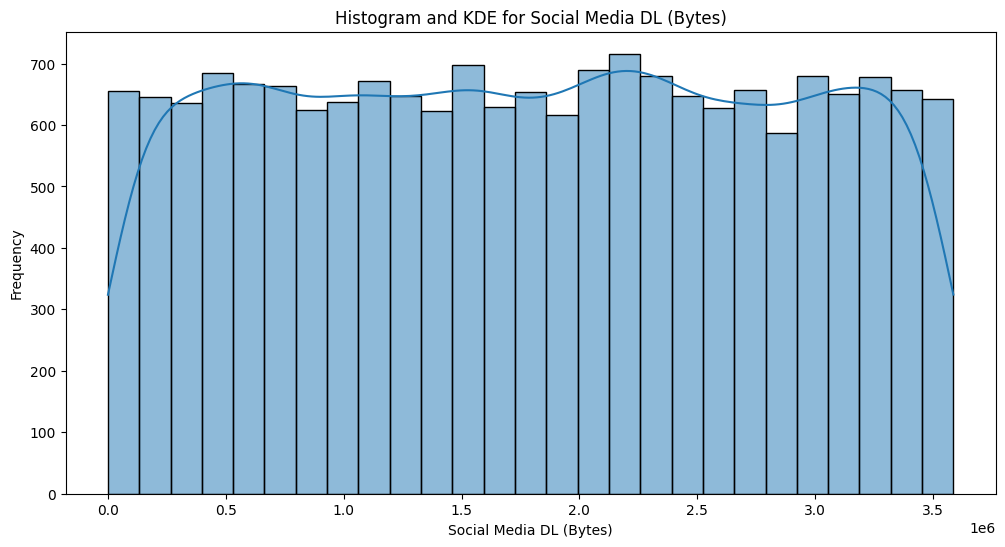

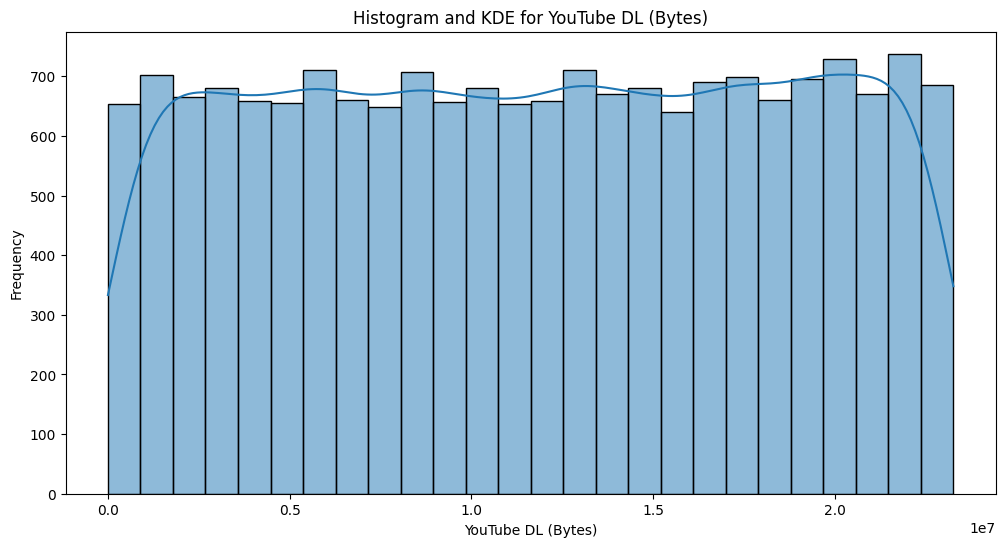

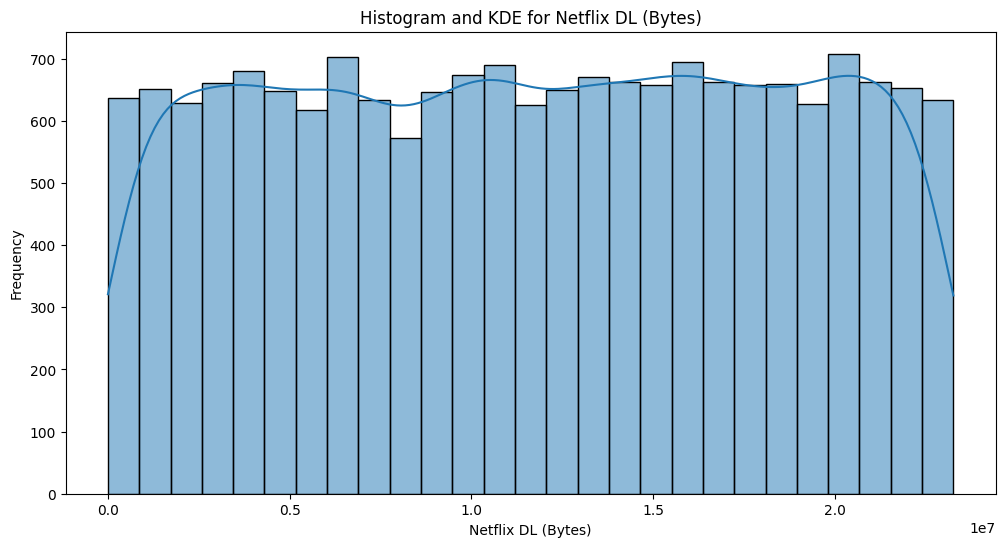

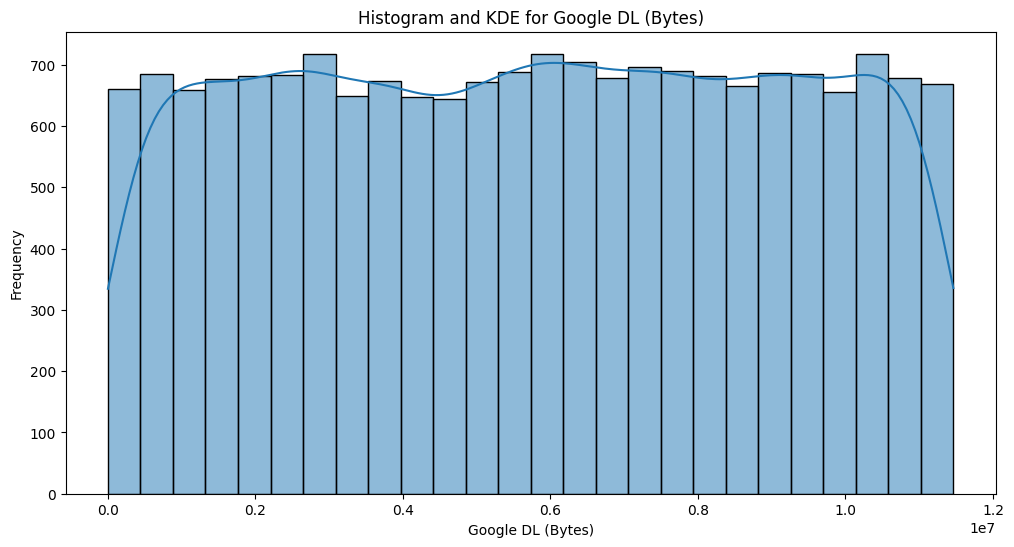

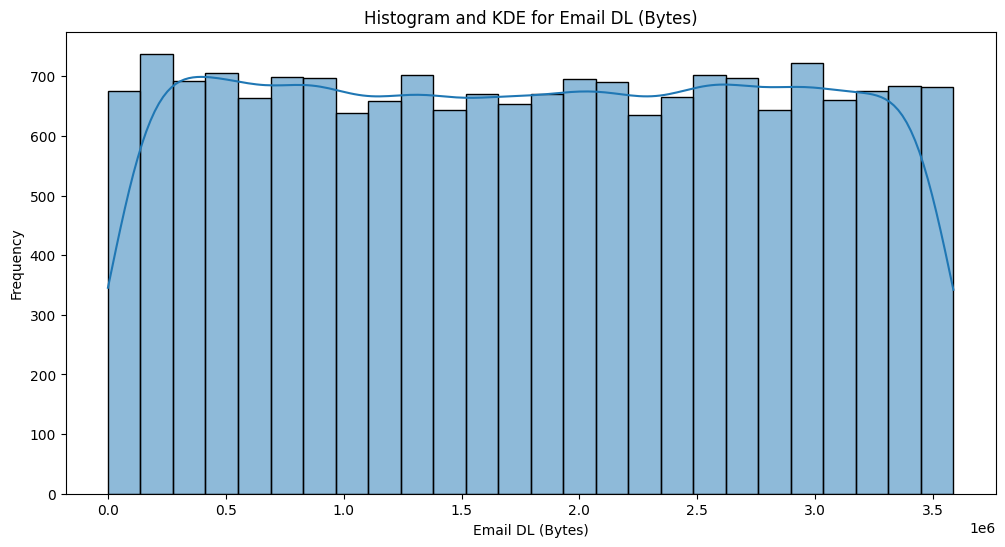

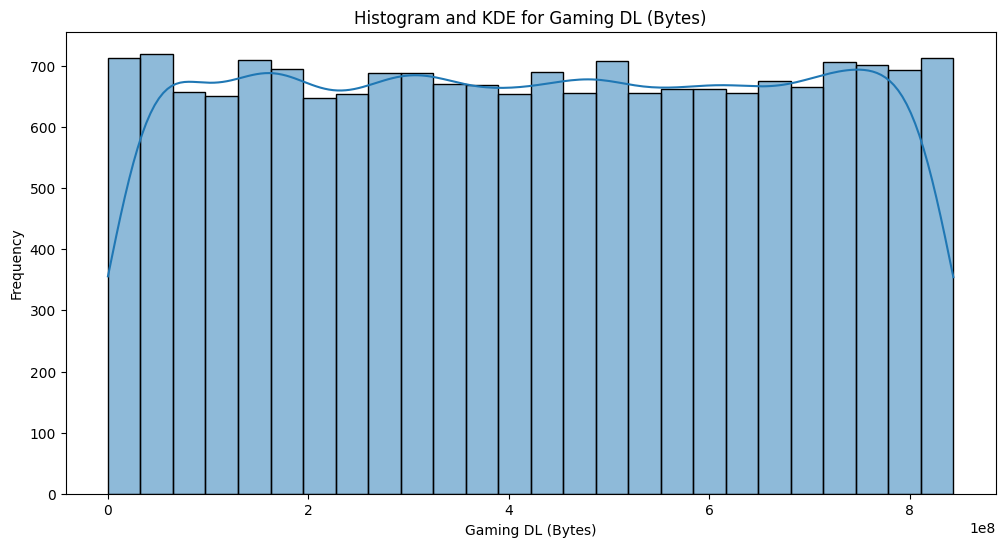

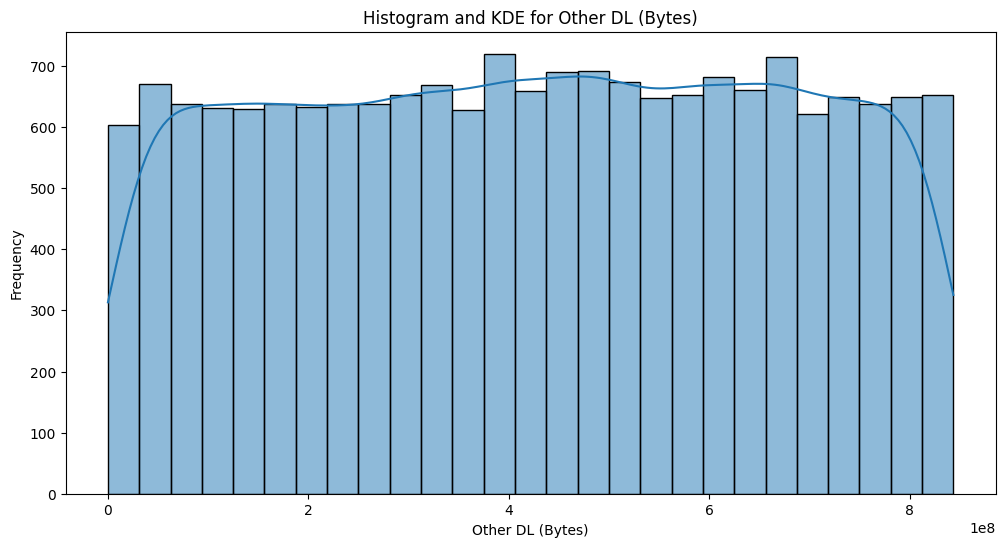

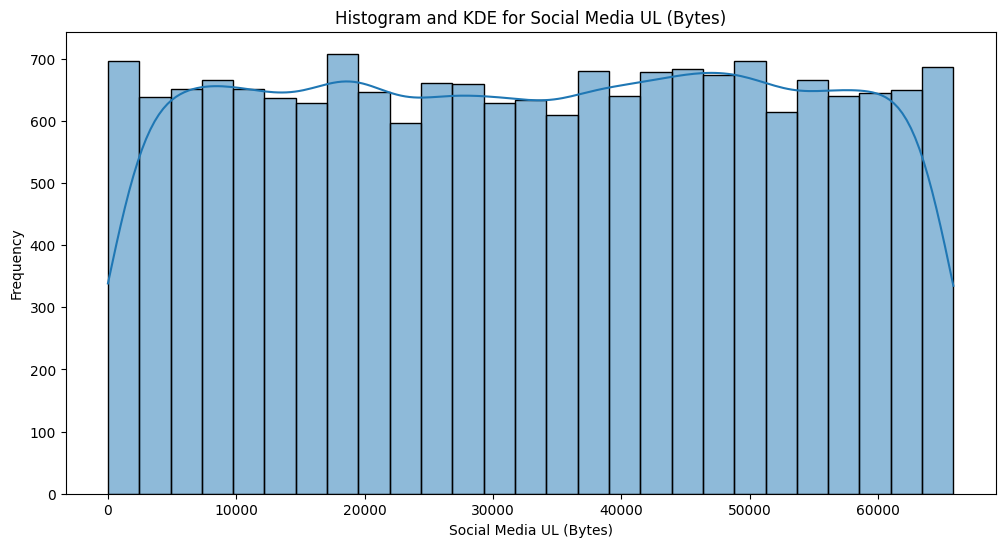

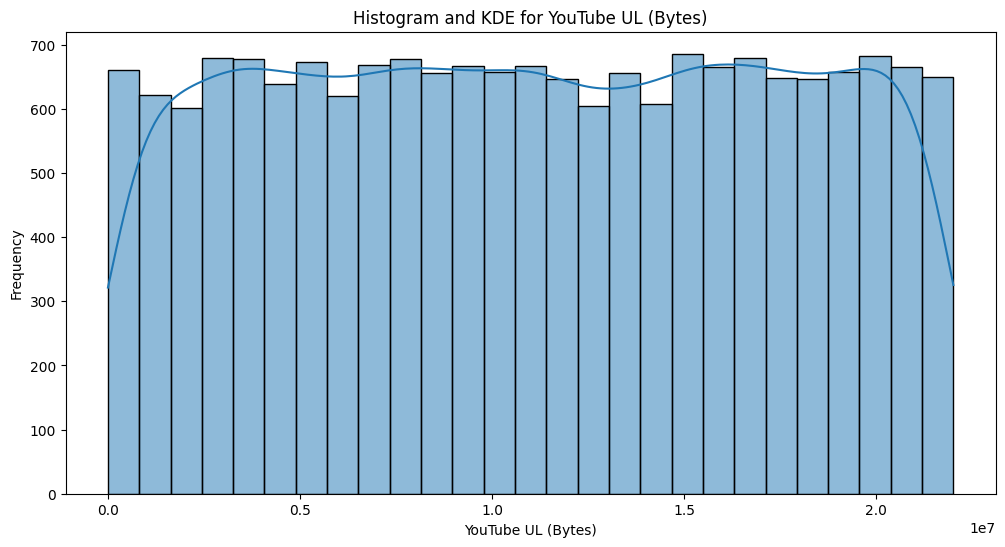

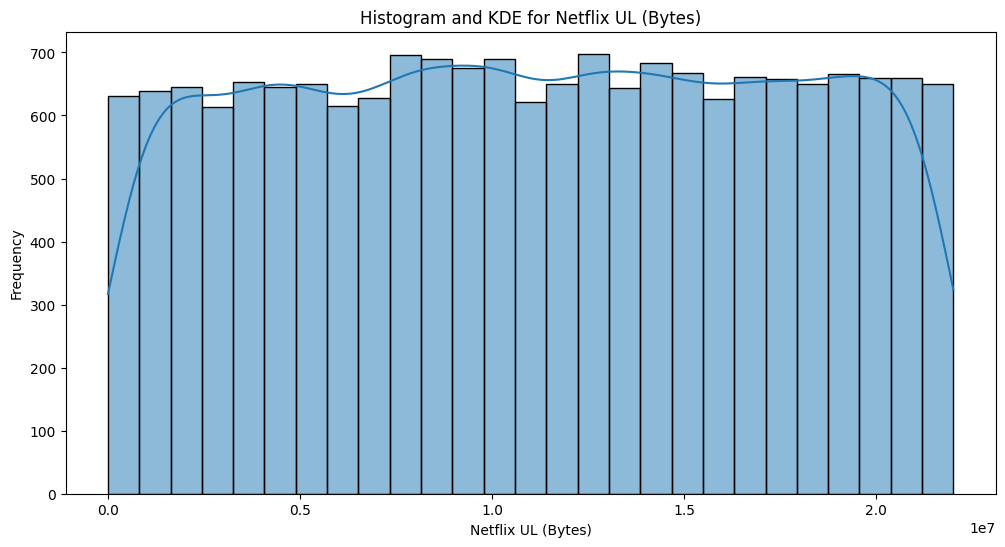

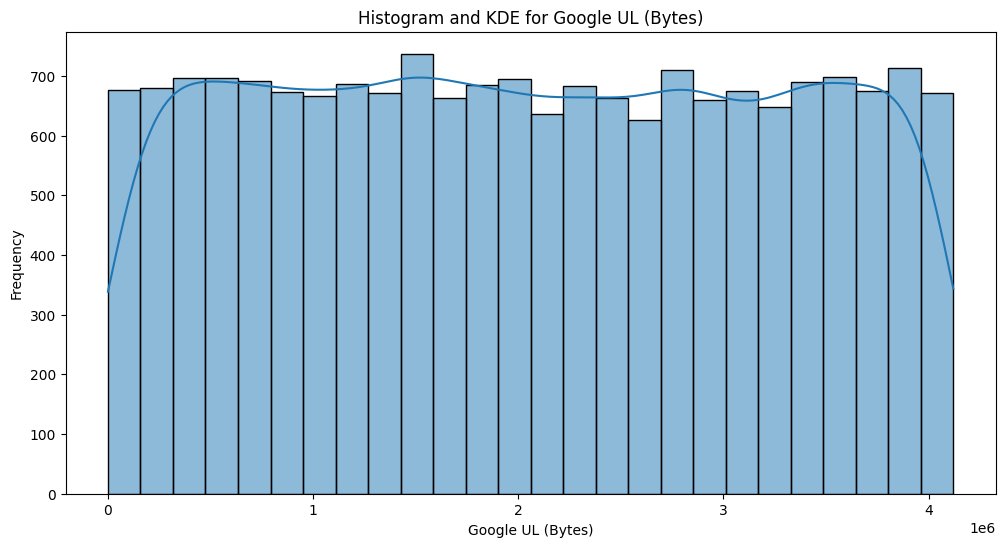

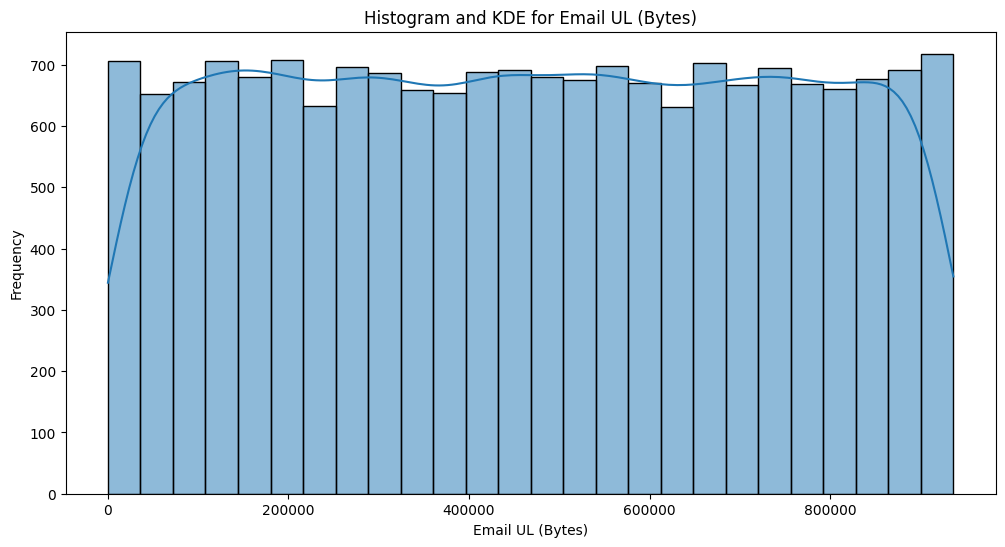

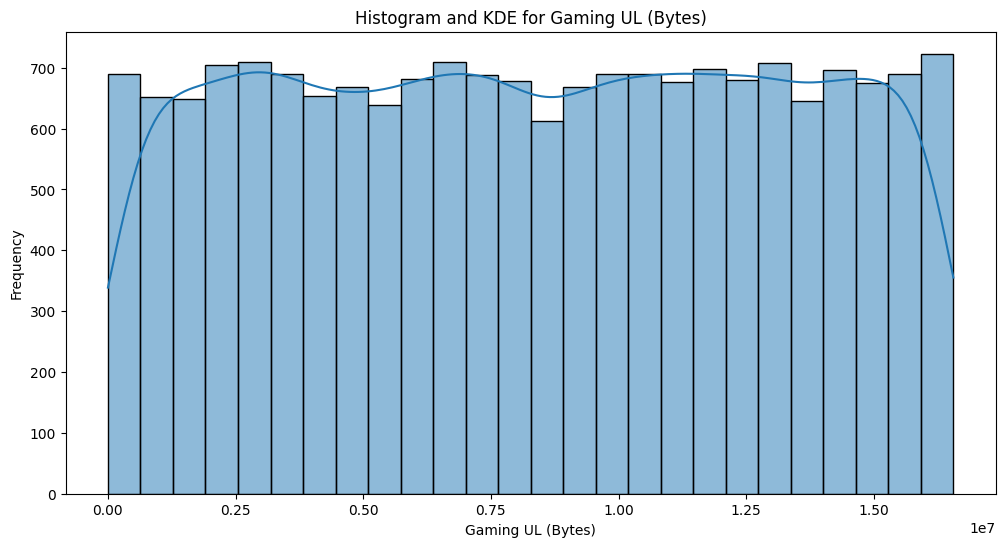

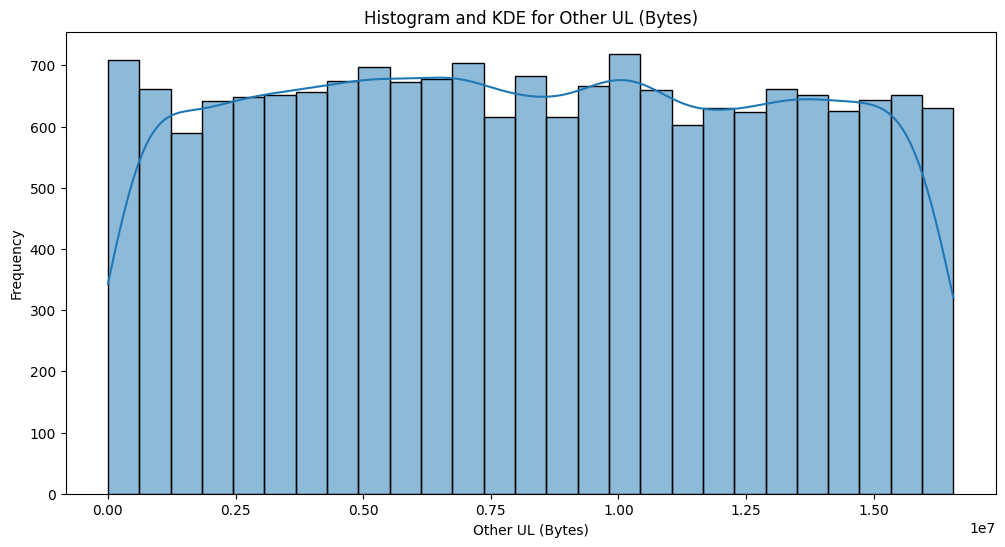

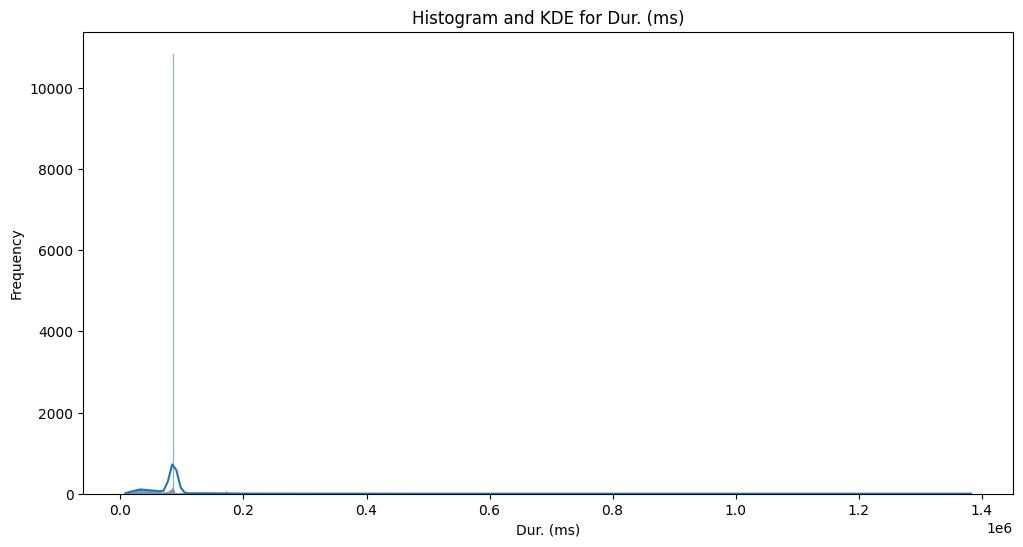

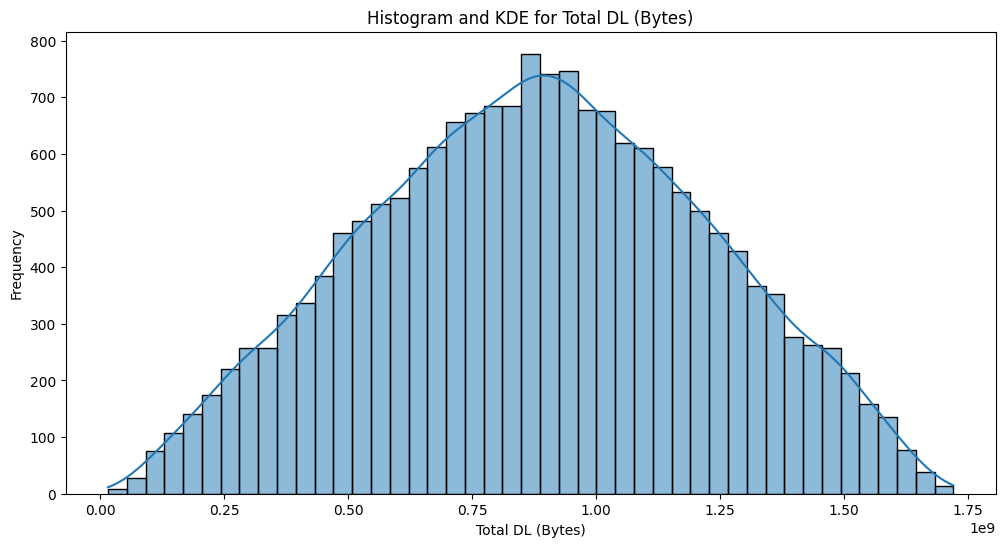

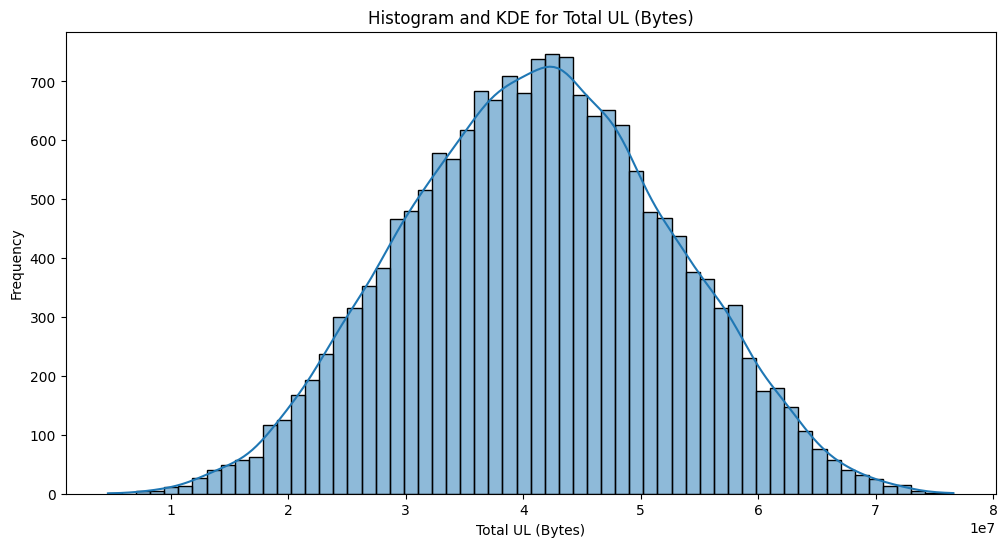

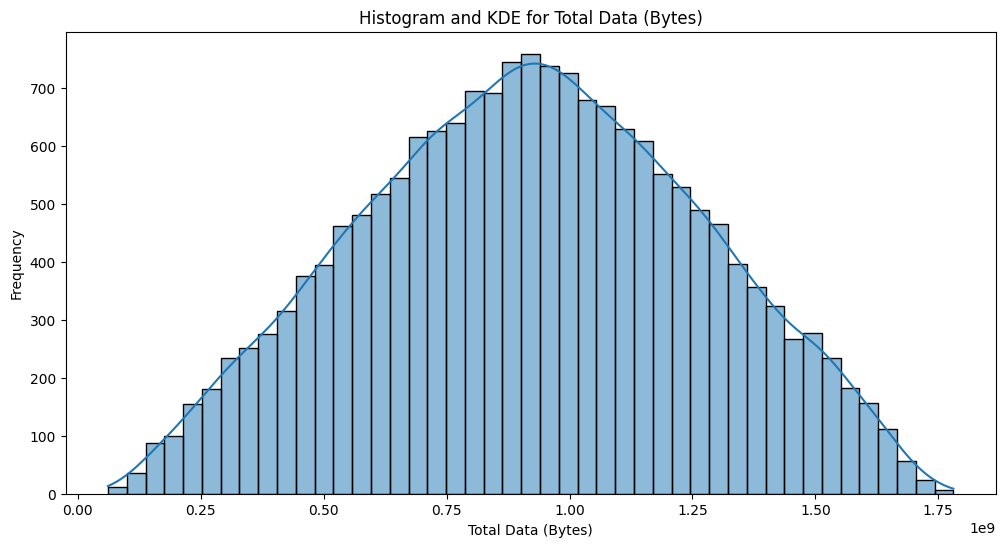

In [80]:
analysis_User_behaviour_analysis.graphical_univariate_analysis()

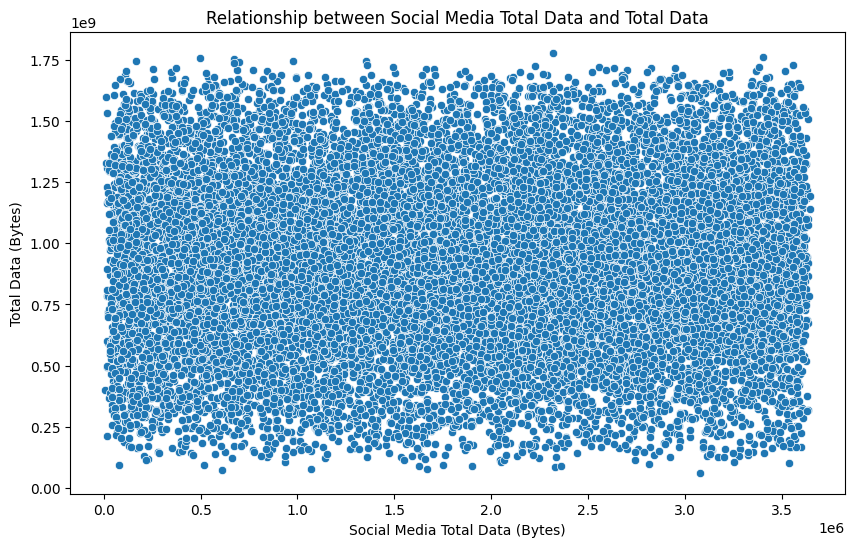

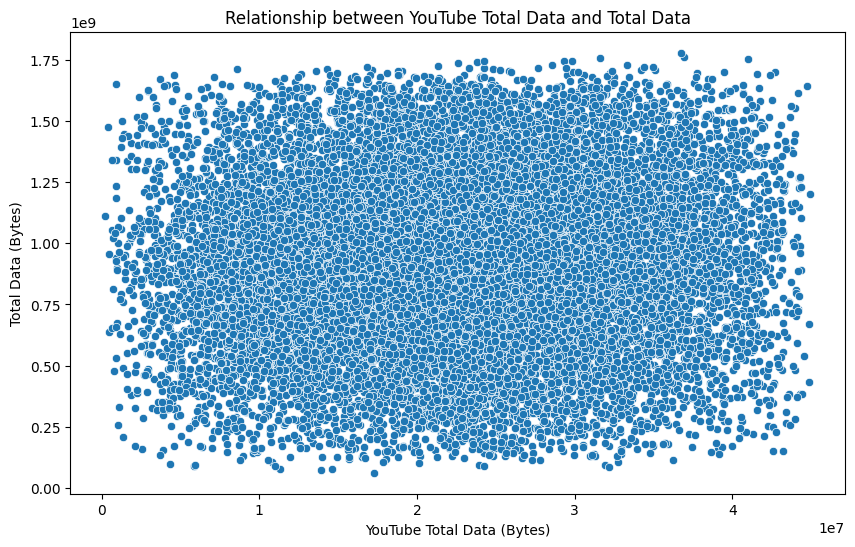

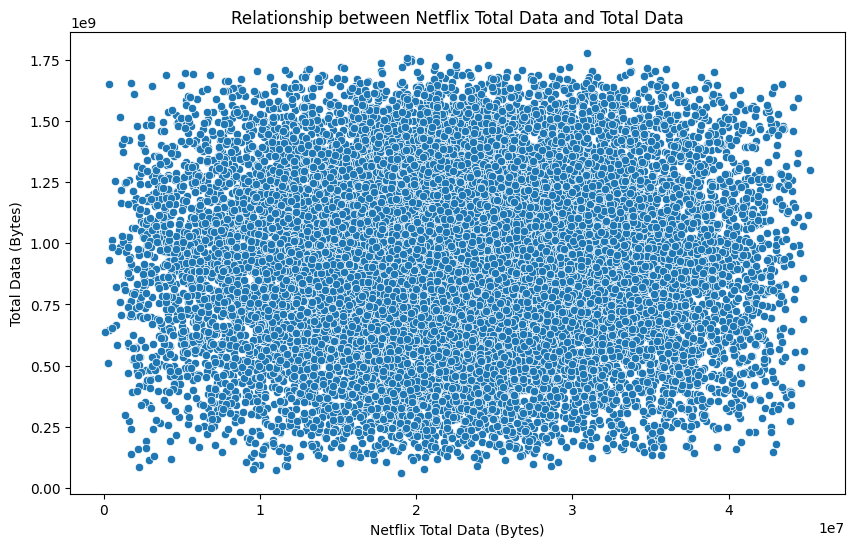

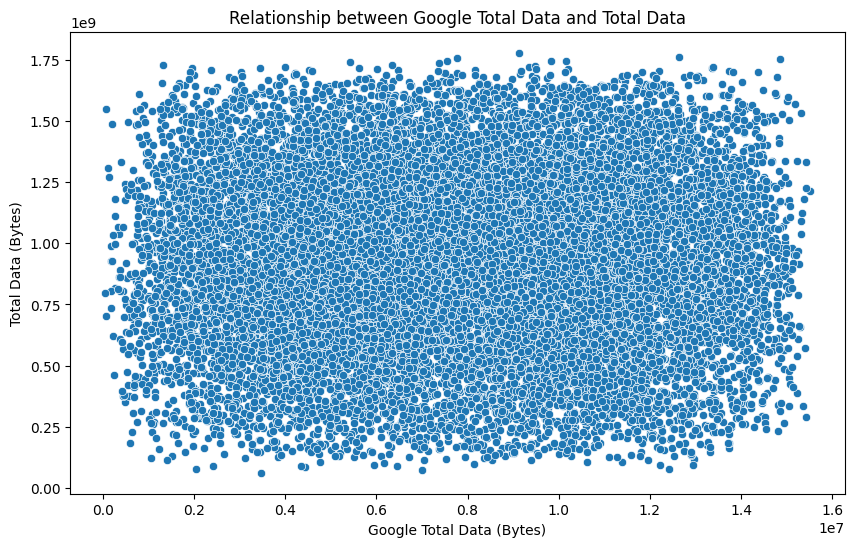

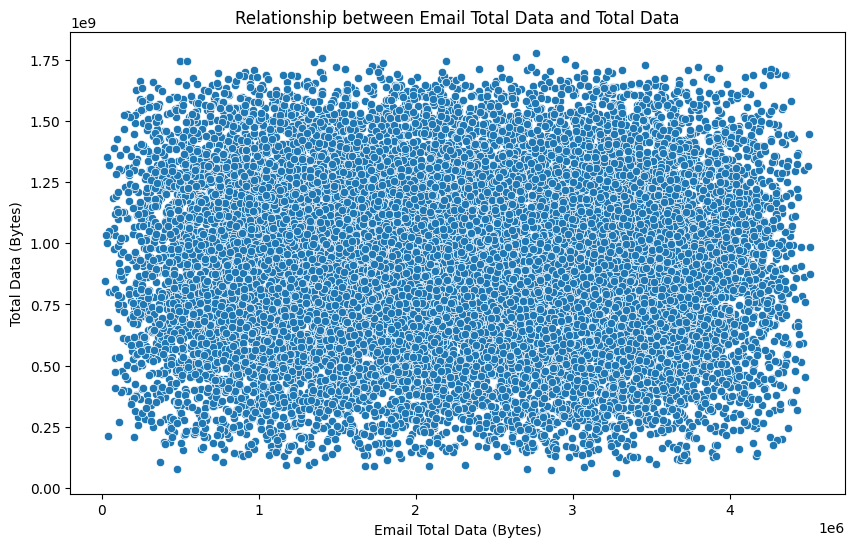

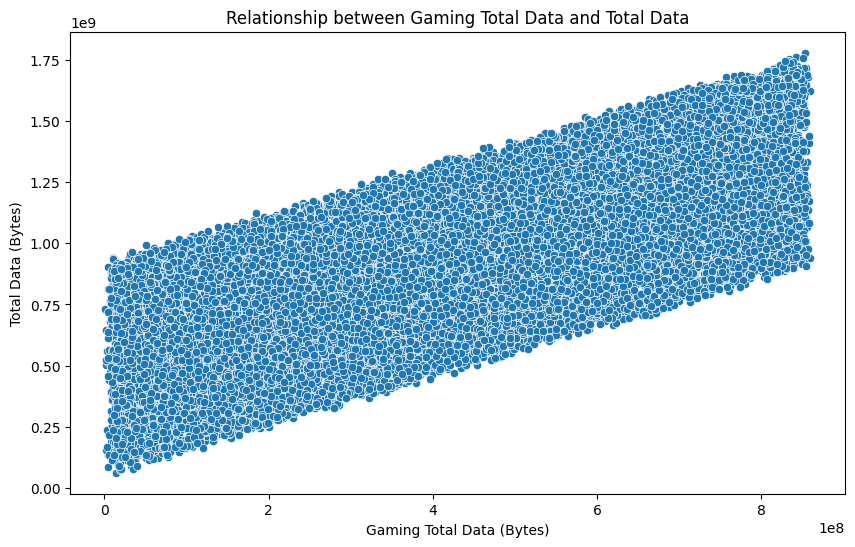

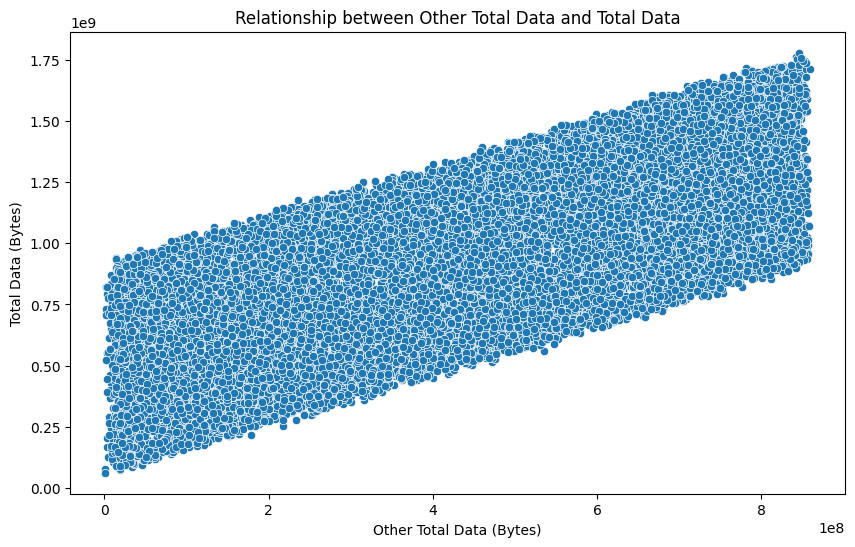

In [74]:
analysis_User_behaviour_analysis.bivariate_analysis()

Correlation Matrix:
                          Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           0.005150   
Google DL (Bytes)                       0.005150           1.000000   
Email DL (Bytes)                        0.005938           0.007202   
YouTube DL (Bytes)                     -0.002417          -0.004749   
Netflix DL (Bytes)                     -0.000361          -0.014078   
Gaming DL (Bytes)                       0.003102           0.009434   
Other DL (Bytes)                        0.013001          -0.003660   

                         Email DL (Bytes)  YouTube DL (Bytes)  \
Social Media DL (Bytes)          0.005938           -0.002417   
Google DL (Bytes)                0.007202           -0.004749   
Email DL (Bytes)                 1.000000            0.000329   
YouTube DL (Bytes)               0.000329            1.000000   
Netflix DL (Bytes)               0.012746           -0.004862   
Gaming DL (Bytes)   

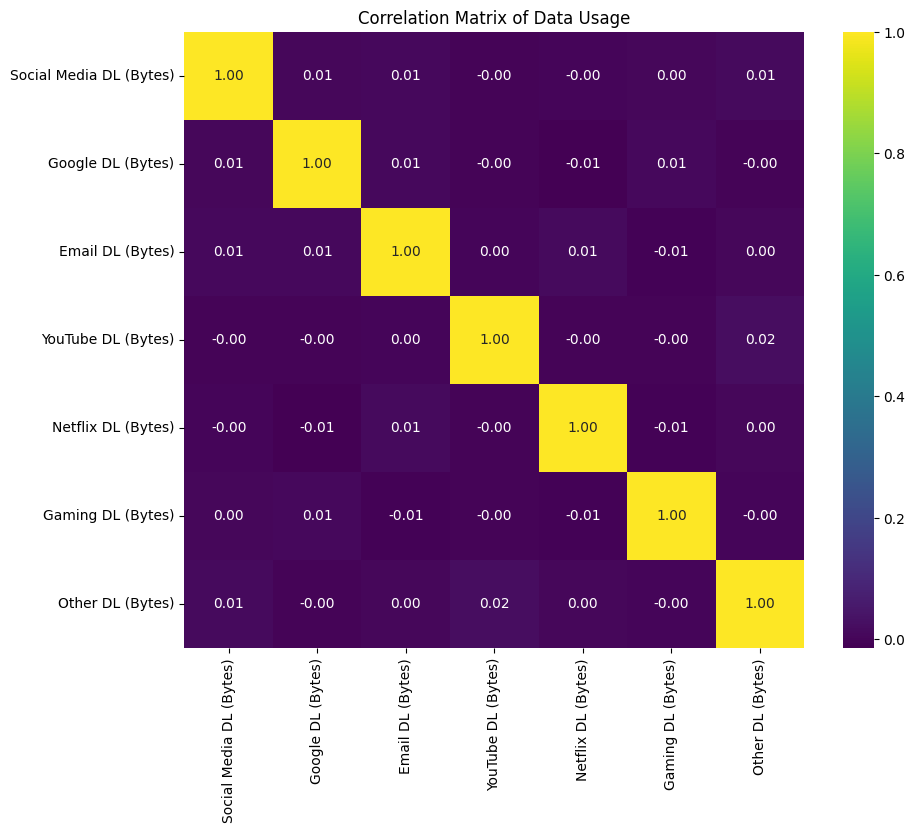

In [81]:
analysis_User_behaviour_analysis.correlation_analysis()


In [82]:
analysis_User_behaviour_analysis.dimensionality_reduction()


Principal Component Analysis Results:
Explained Variance Ratio: [0.07445328 0.07390014 0.07324066 0.07267472 0.0723271  0.07210772
 0.0718176  0.07157534 0.0712452  0.06989807 0.06977214 0.06958359
 0.06900658 0.06839787]
Explained Variance Ratio Cumulative Sum: [0.07445328 0.14835341 0.22159407 0.2942688  0.36659589 0.43870362
 0.51052122 0.58209655 0.65334175 0.72323982 0.79301196 0.86259555
 0.93160213 1.        ]


(array([[ 0.32458348, -0.39173312, -1.28079517, ..., -0.59074984,
          0.80182344,  0.5786543 ],
        [-0.38861291, -1.56695366, -0.26422637, ..., -2.14911931,
          0.28714534,  1.79382644],
        [-1.41178034,  1.89387325, -0.08827601, ..., -0.37449086,
          0.84707103,  1.2311269 ],
        ...,
        [-0.24654268, -0.95484409,  0.04296992, ..., -0.84609509,
          1.02335262,  1.38678871],
        [ 0.22503913, -0.64958962,  2.25178953, ..., -0.04149738,
          1.02658827,  0.03102907],
        [ 0.66173362,  0.03158852,  0.42911996, ...,  1.47871708,
         -1.99593693, -0.88142399]]),
 array([0.07445328, 0.07390014, 0.07324066, 0.07267472, 0.0723271 ,
        0.07210772, 0.0718176 , 0.07157534, 0.0712452 , 0.06989807,
        0.06977214, 0.06958359, 0.06900658, 0.06839787]))

User Engagment Analysis
---
1. Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 
2. Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 
3. Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
4. Aggregate user total traffic per application and derive the top 10 most engaged users per application
5. Plot the top 3 most used applications using appropriate charts.  
6. Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
7. What is the optimized value of k (use elbow method for this)?  
8. Interpret your findings. 




In [26]:
from User_enge import UserEngagementAnalysis
analysis_user_Engagement = UserEngagementAnalysis(df_final)
analysis_user_Engagement.aggregate_metrics()


In [20]:
analysis_user_Engagement.normalize_metrics()

In [21]:

analysis_user_Engagement.kmeans_clustering()

In [22]:

analysis_user_Engagement.compute_cluster_stats()

d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\User_enge.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='session_frequency', y='MSISDN/Number', data=top_10_freq, palette="viridis", ax=axes[0])
d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\User_enge.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_duration', y='MSISDN/Number', data=top_10_duration, palette="viridis", ax=axes[1])
d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\User_enge.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_traffic_dl', y='MSISDN/Number', da

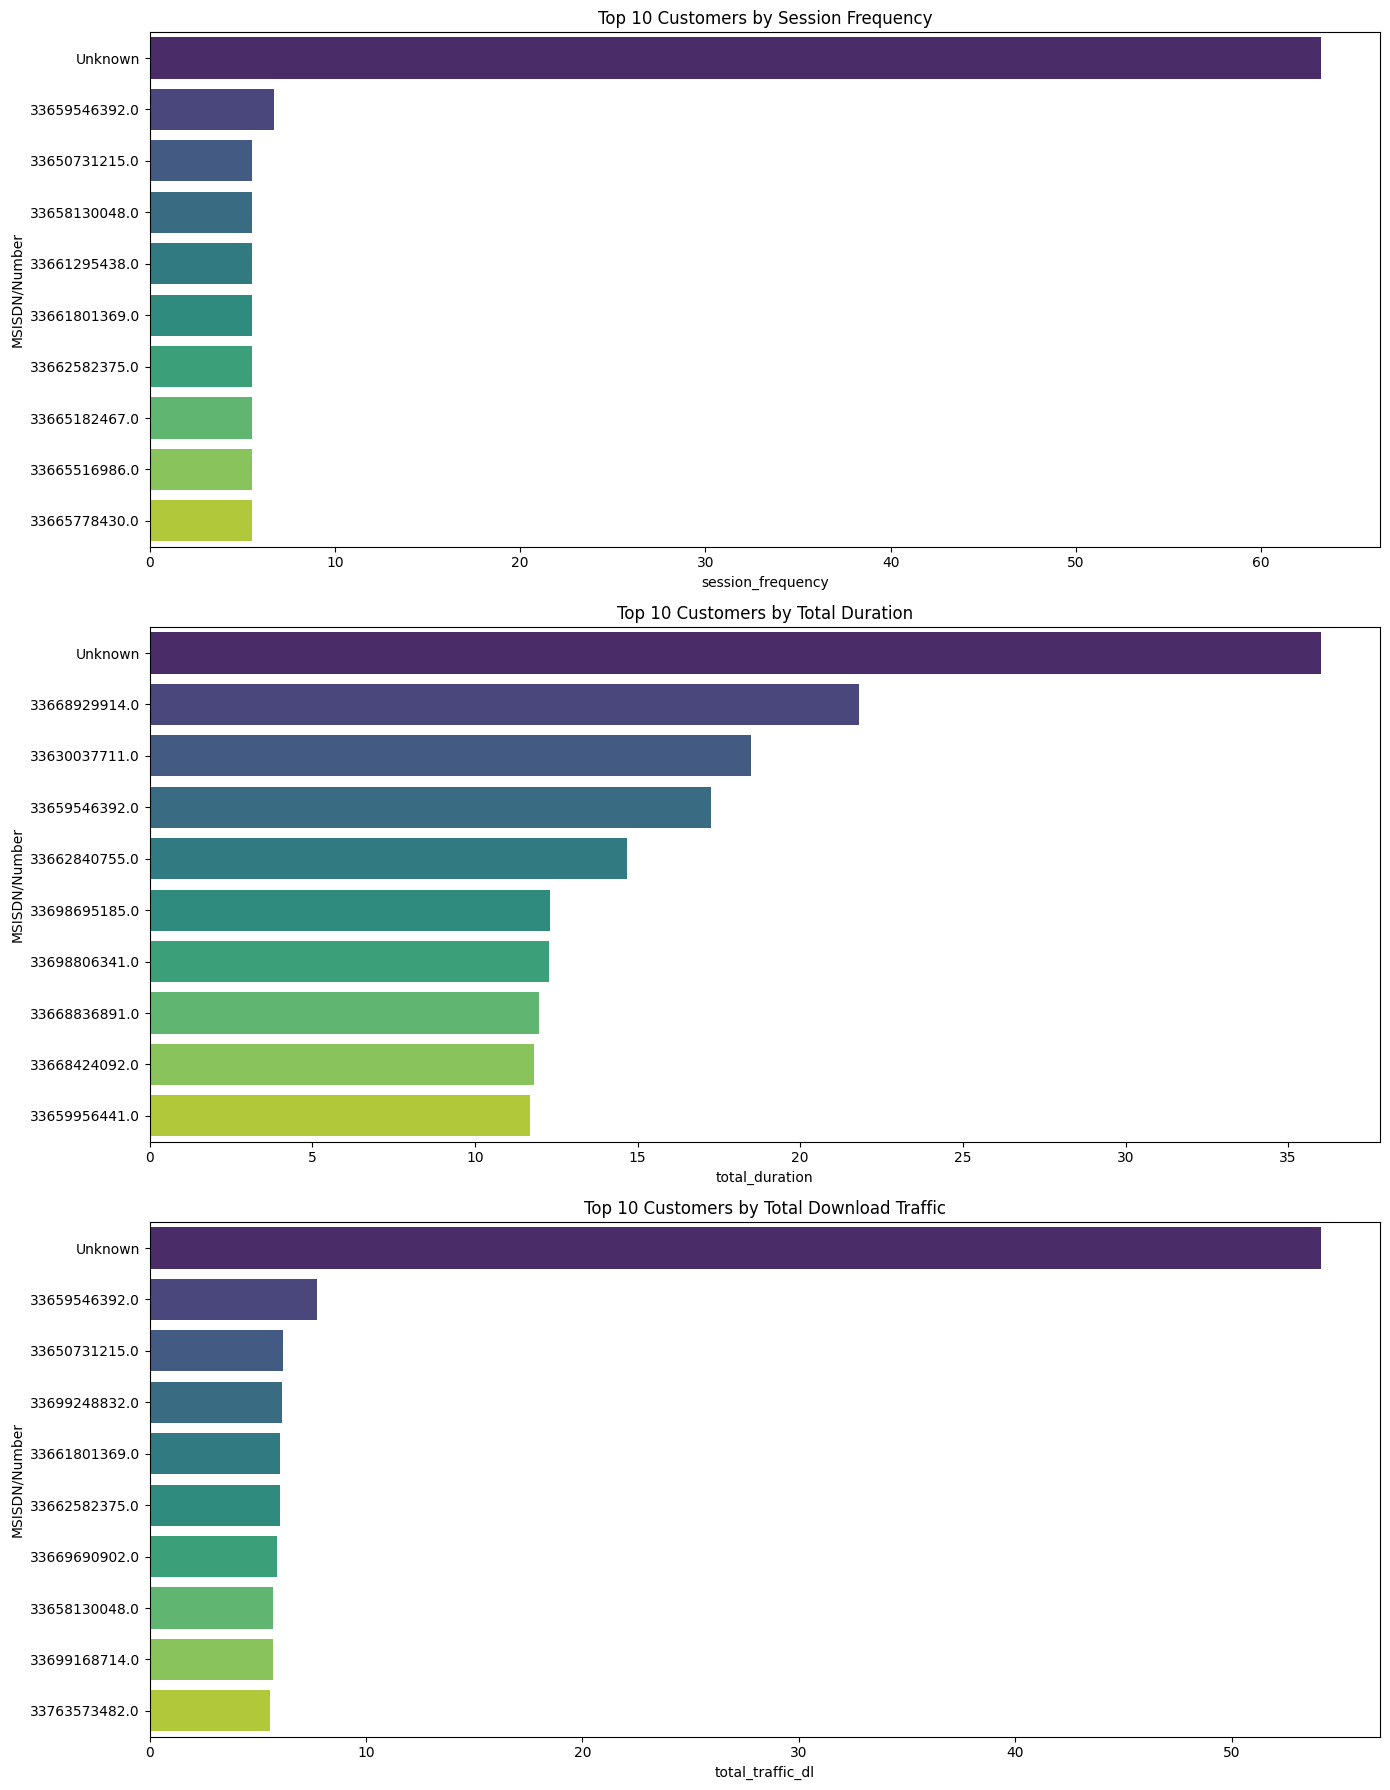

In [23]:

analysis_user_Engagement.plot_engagement_metrics()

Column error: "None of [Index(['YouTube DL (Bytes)', 'YouTube UL (Bytes)'], dtype='object')] are in the [columns]"


d:\10 ACADAMY KIFIYA\Week-2\Telecom\scripts\User_enge.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=apps, y=usage, palette="viridis")


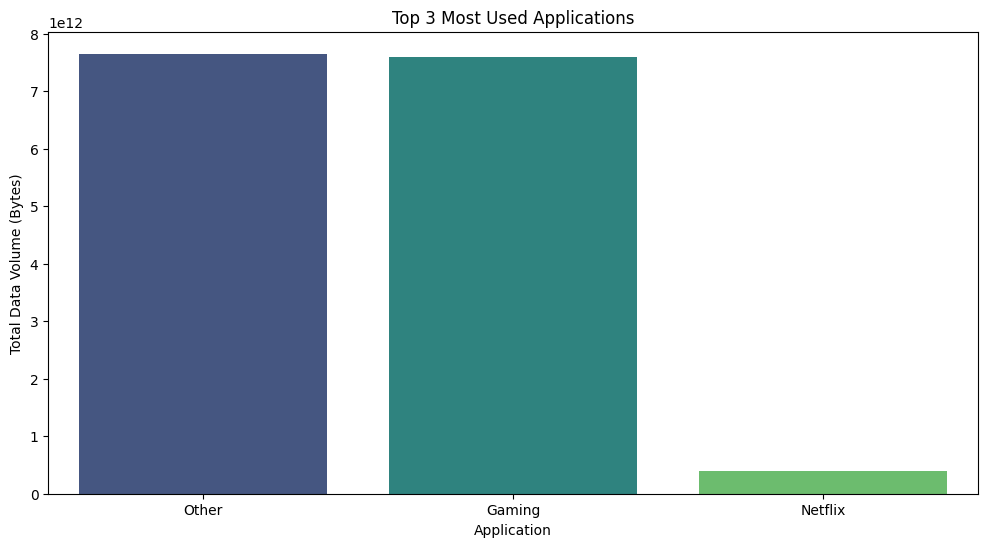

In [24]:

analysis_user_Engagement.plot_application_usage()

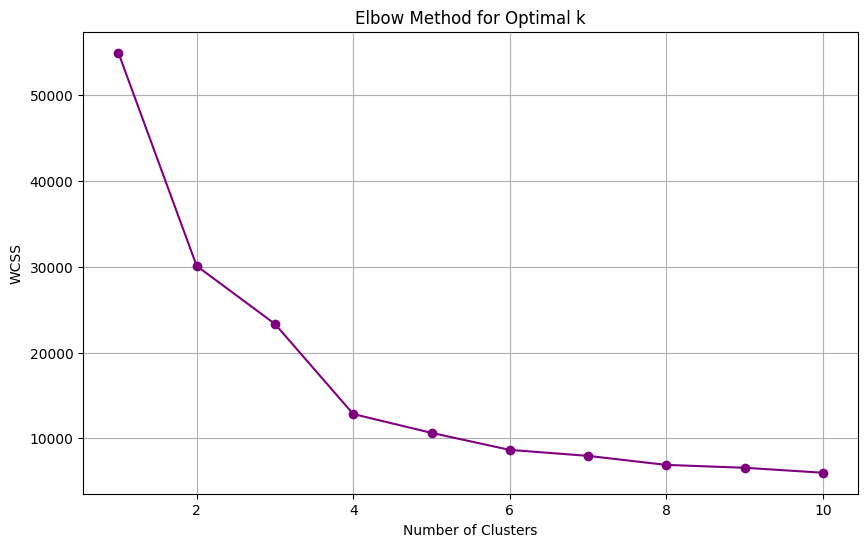

In [25]:
analysis_user_Engagement.plot_elbow_method()